In [1]:
"""
@Josh Boquiren
Behavioral Analysis
Ver. I
OTIS Lab MUSC
11.10.2022

README:
//Calculates the AUROC for Jackie's Pavlovian project

TO-DO:

"""

'\n@Josh Boquiren\nBehavioral Analysis\nVer. I\nOTIS Lab MUSC\n11.10.2022\n\nREADME:\n\nTO-DO:\n - make confusion matrix\n - calculate aucROC\n\n'

In [2]:
"""import start libraries"""

import scipy.io
import pandas as pd
import polars as pl
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os


Gathering data

In [3]:
"""Importing data and creating dataframe"""

##to run from JB's computer
basedir = r"C:\Users\jboqu\Dropbox\2P Imaging Projects\Jackie\Josh\Projects\Behavioral_Analysis\PavRawData"

##to run from lab computer
# basedir = r"C:\Users\otisl\Dropbox\Jackie Projects\Projects\PFC_GFAP-PMCA_Pavlovian-Sucrose\PMCA_Rawdata\Pav-Acq\PC_D1"

for folder in os.listdir(basedir):
    if folder.__contains__("."):
        ("Working folder:", folder, "SKIPPED!")
    else:
        print("Working folder:", folder)
        data = []
        for file in os.listdir(os.path.join(basedir, folder)):
            if file.endswith(".mat") == False:
                print("     --->", file, "SKIPPED!")
            if file.endswith(".mat"): #only runs .mat files
                print("     --->", file)
                mat = scipy.io.loadmat(os.path.join(basedir, folder, file))
                lis = list(mat) #stores headers that are in mat file; print this to see what headers are in the .mat file

                #divide all columns by 1000 to convert to seconds
                cues = np.squeeze(np.array(mat['cues'][1:]))/1000
                cues_neg = np.squeeze(np.array(mat['cuesminus'][1:]))/1000
                cues_pos = [i for i in cues if i not in cues_neg]
                fxdpumps = np.squeeze(np.array(mat['fxdpumps']))/1000
                licks = np.squeeze(np.array(mat['licks']))/1000


Working folder: PC_D1
     ---> output.xlsx SKIPPED!
     ---> PMCA1_PC-D1_0_6000_221025-173015.mat
     ---> PMCA2_PC-D1_0_6000_221026-125612.mat
     ---> PMCA3_PC-D1_0_6000_221026-144102.mat
     ---> PMCA4_PC-D1_0_6000_221026-151751.mat
     ---> PMCA5_PC-D1_0_6000_221027-152335.mat
     ---> PMCA6_PC-D1_0_6000_221026-170851.mat
     ---> PMCA7_PC-D1_0_6000_221026-173437.mat
     ---> TDT2-PC-D1_0_6000_221025-171310.mat
     ---> TDT3_PC-D1_0_6000_221026-132941.mat
     ---> TDT4_PC-D1_0_6000_221026-140711.mat
     ---> TDT5_PC-D1_0_6000_221026-155611.mat
     ---> TDT6_PC-D1_0_6000_221026-162706.mat
     ---> TDT7_PC-D1_0_6000_221026-181641.mat
     ---> TDT8_PC-D1_0_6000_221027-175401.mat
Working folder: PC_D2
     ---> output.xlsx SKIPPED!
     ---> PMCA1_PC-D2_0_6000_221026-121510.mat
     ---> PMCA2_PC-D2_0_6000_221027-114548.mat
     ---> PMCA3_PC-D2_0_6000_221027-124557.mat
     ---> PMCA4_PC-D2_0_6000_221027-141123.mat
     ---> PMCA5_PC-D2_0_6000_221101-145502.mat
     ---

In [4]:
"""Compiling data"""

##to run from JB's computer
basedir = r"C:\Users\jboqu\Dropbox\2P Imaging Projects\Jackie\Josh\Projects\Behavioral_Analysis\PavRawData"

##to run from lab computer
# basedir = r"C:\Users\otisl\Dropbox\Jackie Projects\Projects\PFC_GFAP-PMCA_Pavlovian-Sucrose\PMCA_Rawdata\Pav-Acq\PC_D1"

row = []
for folder in os.listdir(basedir):
    if folder.__contains__("."):
        ("Working folder:", folder, "SKIPPED!")
    else:
        print("Working folder:", folder)
        for file in os.listdir(os.path.join(basedir, folder)):
            if file.endswith(".mat") == False:
                print("     --->", file, "SKIPPED!")
            if file.endswith(".mat"): #only runs .mat files
                print("     --->", file)
                mat = scipy.io.loadmat(os.path.join(basedir, folder, file))
                lis = list(mat) #stores headers that are in mat file; print this to see what headers are in the .mat file
                cuesminus = np.squeeze(np.array(mat['cuesminus'][1:]))/1000 #converting everything to seconds by dividing by 1000 
                cues = np.squeeze(np.array(mat['cues'][1:]))/1000
                fxdpumps = np.squeeze(np.array(mat['fxdpumps']))/1000
                licks = np.squeeze(np.array(mat['licks']))/1000
                cuesplus = []
                for i in cues:
                    if i not in cuesminus:
                        cuesplus.append(i)
                cuesplus = np.array(cuesplus)
                # print("Cues:", len(cues), "Cuesplus:", len(cuesplus), "Cuesminus:", len(cuesminus), "Licks:", len(licks))

                """assigning CS type with reward delivery or absence of reward delivery"""
                for i in cues:
                    baseline_range = i-1, i
                    trace_range = i, i+3
                    baseline_licks = 0
                    trace_licks = 0
                    for lick in licks:
                        if lick>baseline_range[0] and lick<baseline_range[1]: #increments if in range baseline interval
                            baseline_licks+=1 
                        elif lick>trace_range[0] and lick<trace_range[1]: #increments if in range trace interval
                            trace_licks+=1
                    delta = trace_licks - baseline_licks
                    if i in cuesminus:
                        row.append({
                            "File": file,
                            "Licks in Baseline": baseline_licks, 
                            "Event Time": i, 
                            "Event Type": "-", 
                            "Licks in Trace Interval": trace_licks,
                            "Delta": delta,
                            "Outcome": 0})
                    elif i in cuesplus:
                        row.append({
                            "File": file,
                            "Licks in Baseline": baseline_licks, 
                            "Event Time": i, 
                            "Event Type": "+", 
                            "Licks in Trace Interval": trace_licks,
                            "Delta": delta,
                            "Outcome": 1})


Working folder: PC_D1
     ---> output.xlsx SKIPPED!
     ---> PMCA1_PC-D1_0_6000_221025-173015.mat
     ---> PMCA2_PC-D1_0_6000_221026-125612.mat
     ---> PMCA3_PC-D1_0_6000_221026-144102.mat
     ---> PMCA4_PC-D1_0_6000_221026-151751.mat
     ---> PMCA5_PC-D1_0_6000_221027-152335.mat
     ---> PMCA6_PC-D1_0_6000_221026-170851.mat
     ---> PMCA7_PC-D1_0_6000_221026-173437.mat
     ---> TDT2-PC-D1_0_6000_221025-171310.mat
     ---> TDT3_PC-D1_0_6000_221026-132941.mat
     ---> TDT4_PC-D1_0_6000_221026-140711.mat
     ---> TDT5_PC-D1_0_6000_221026-155611.mat
     ---> TDT6_PC-D1_0_6000_221026-162706.mat
     ---> TDT7_PC-D1_0_6000_221026-181641.mat
     ---> TDT8_PC-D1_0_6000_221027-175401.mat
Working folder: PC_D2
     ---> output.xlsx SKIPPED!
     ---> PMCA1_PC-D2_0_6000_221026-121510.mat
     ---> PMCA2_PC-D2_0_6000_221027-114548.mat
     ---> PMCA3_PC-D2_0_6000_221027-124557.mat
     ---> PMCA4_PC-D2_0_6000_221027-141123.mat
     ---> PMCA5_PC-D2_0_6000_221101-145502.mat
     ---

In [5]:
"""Creating dataframe"""

df = pd.DataFrame(row)
print(df.head())

print("\n", df.isnull().values.any())

                                   File  Licks in Baseline  Event Time  \
0  PMCA1_PC-D1_0_6000_221025-173015.mat                  0      39.518   
1  PMCA1_PC-D1_0_6000_221025-173015.mat                  0      74.243   
2  PMCA1_PC-D1_0_6000_221025-173015.mat                  2     103.028   
3  PMCA1_PC-D1_0_6000_221025-173015.mat                  2     128.717   
4  PMCA1_PC-D1_0_6000_221025-173015.mat                  0     151.784   

  Event Type  Licks in Trace Interval  Delta  Outcome  
0          -                        0      0        0  
1          +                        0      0        1  
2          -                        3      1        0  
3          +                        0     -2        1  
4          -                        1      1        0  

 False


Calculating AUROC

In [19]:
"""import libraries"""

from sklearn.model_selection import train_test_split
import scipy.stats as stats
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

In [20]:
"""clean data"""

X = df.drop(['Outcome', 'Event Type', 'File'],axis=1) #get rid of any non-number variables (leaves predictor variables)
y = df['Outcome'] #assigns response variable

# standardization
X = (X-X.mean())/X.std()

X.head()

,Licks in Baseline,Event Time,Licks in Trace Interval,Delta
0,-0.378604,-1.707393,-0.608696,-0.486958
1,-0.378604,-1.675387,-0.608696,-0.486958
2,0.614754,-1.648855,-0.040449,-0.288303
3,0.614754,-1.625177,-0.608696,-0.884269
4,-0.378604,-1.603916,-0.419280,-0.288303


In [21]:
"""train data"""

#split the dataset into training (75%) and testing (25%) sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25)

#instantiate the model
log_regression = LogisticRegression()

#fit the model using the training data
log_regression.fit(X_train,y_train)


LogisticRegression()

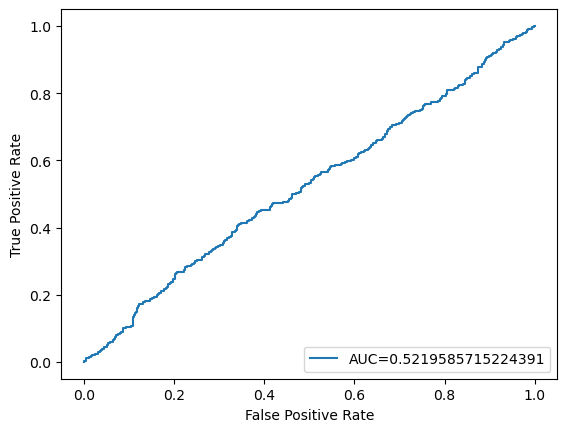

In [22]:
"""calculation and plotting"""


#define metrics
y_pred_proba = log_regression.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [ ]:
"""Saving to .csv"""

# df.to_excel(os.path.join(basedir, "output.xlsx"), sheet_name=("Output")) #creates and sends data to excel file and creates a named sheet
# print("         ===> Output file created.")